# Scikit-Learn (Classification) Walkthrough - Heart Disease Prediction Model

## Overview
This project aims to leverage Python-based machine learning and data science libraries to construct a predictive model that estimates the probability of heart disease in individuals based on their medical attributes.

## Methodology
The process will include the following steps

1. **Data Preparation**: Load and preprocess the data for modeling.
2. **Model Selection**: Choose an appropriate algorithm for the prediction task.
3. **Model Training**: Fit the selected model to the training data.
4. **Model Evaluation**: Assess the model's performance with validation data.
5. **Model Improvement**: Optimize the model through hyperparameter tuning and experimentation.
6. **Model Deployment**: Save and document the model for future use.

## Problem Statement
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## Data Source
* The original dataset is sourced from the UCI Machine Learning Depository (https://archive.ics.uci.edu/ml/datasets/heart+Disease).
* An alternative version of the dataset is available on Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci).

See **Data Dictionary** below:
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)"

## 0. Standard Library Imports

In most machine learning projects, we import a suite of foundational libraries that are essential for various tasks throughout the project:

1. matplotlib: For creating visualizations to explore the data and results.
2. numpy: For efficient numerical computations.
3. pandas: For data manipulation and retrieval.
4. sklearn: For implementing machine learning algorithms.

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score

# Suppress warning
import warnings
warnings.filterwarnings('ignore')

## 1. Data Preperation

The first step in any machine learning project is to understand and prepare the data. We start by loading the dataset and examining its structure to determine the next steps

In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv("heart-disease.csv")

# Display the dimensions of the DataFrame (rows, columns)
df.shape  # Output: (303, 14)

(303, 14)

In [3]:
# Preview the first few rows of the DataFrame
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


With the data loaded, we proceed to split the dataset into features (**X**) and the target variable (**y**). The target variable is what we aim to predict, in this case, the presence of heart disease.

In [4]:
# Prepare the features and target variable
X = df.drop("target", axis=1)  # Features: all columns except 'target'
y = df["target"]               # Target variable: 'target' column

# Set a seed for reproducibility
np.random.seed(42)

In [5]:
# Split the dataset into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Verify the shapes of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # Outputs the dimensions

((242, 13), (61, 13), (242,), (61,))

## 2. Model Selection

When selecting a model or estimator for a machine learning task, it is helpful to refer to a guide like the Scikit-Learn machine learning map (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

For this classification problem, we will explore the following estimators:

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

These models are chosen for their suitability to binary classification problems, as well as their diverse underlying mechanisms which can provide a broad perspective on the problem's solution space.

In [6]:
# Initialize models in a dictionary
# This structure allows for convenient iteration over each model for training and evaluation.
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

## 3. Model Training

We will define a function that can fit various machine learning models to our training data and evaluate their performance on the test data.

In [7]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dictionary of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels

    Returns a dictionary of model scores.
    """
    # Set a random seed for reproducible results
    np.random.seed(42)

    # Create a dictionary to keep the scores of each model
    model_scores = {}

    # Loop through the models passed in the 'models' dictionary
    for name, model in models.items():
        # Fit the model to the training data
        model.fit(X_train, y_train)
        # Evaluate the model on the test data and store the score in the dictionary
        model_scores[name] = model.score(X_test, y_test)
    
    # Return the model scores dictionary with the model names and their corresponding evaluation score
    return model_scores

In [8]:
# Use the function to train and evaluate the models
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

# Display the performance of each model
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## 4. Model Evaluation
Each Scikit-Learn model supports a variety of evaluation metrics that can be applied, depending on the nature of the model and the problem at hand. In this section, we focus on the evaluation metrics for Logistic Regression, which has demonstrated the highest accuracy score in our earlier comparisons.

A comprehensive list of evaluation metrics is available in the Scikit-Learn documentation. (https://scikit-learn.org/stable/modules/model_evaluation.html) For classification models, common evaluation metrics include:
* Accuracy 
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)
* Confusion Matrix

In addition to these metrics, we will also investigate the model's performance through Cross-Validation Evaluation, which provides a more robust understanding of its predictive power by testing the model's effectiveness on different subsets of the data.

In [9]:
# Initialize the Logistic Regression model
clf = LogisticRegression()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_preds = clf.predict(X_test)

By default, Scikit-Learn models use accuracy as the score metric when the .score() method is called

In [10]:
default_score = clf.score(X_test, y_test)
print(f"Accuracy Score: {default_score}")

Accuracy Score: 0.8852459016393442


In [11]:
## Different classification metrics for model evaluation

# Accuracy
# The accuracy_score function measures the proportion of correct predictions
print(f"Accuracy Score: {accuracy_score(y_test, y_preds)}")

# Precision
# Precision measures the ratio of true positives to the sum of true and false positives (the quality of the positive predictions)
print(f"Precision Score: {precision_score(y_test, y_preds)}")

# Recall
# Recall (or sensitivity) measures the ratio of true positives to the sum of true positives and false negatives (the ability to find all positive samples)
print(f"Recall Score: {recall_score(y_test, y_preds)}")

# F1 Score
# The F1 score is the harmonic mean of precision and recall and is useful for unbalanced classes
print(f"F1 Score: {f1_score(y_test, y_preds)}")

# Classification report
# The classification_report provides a summary of precision, recall, and F1 score for each class
print(f"Classification Report:\n {classification_report(y_test, y_preds)}")

# Receiver Operating Characteristic (ROC curve) / Area under curve (AUC)
# The ROC curve is a plot of true positive rate against false positive rate at various threshold settings
# The AUC score is the area under the ROC curve; higher values indicate better discrimination by the model
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
print(f"AUC Score: {roc_auc_score(y_test, y_preds)}")

# Confusion matrix
# The confusion matrix is a table that is used to describe the performance of a classification model
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_preds)}")

Accuracy Score: 0.8852459016393442
Precision Score: 0.8787878787878788
Recall Score: 0.90625
F1 Score: 0.8923076923076922
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

AUC Score: 0.8841594827586207
Confusion Matrix:
 [[25  4]
 [ 3 29]]


### Plotting ROC Curve

The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The Area Under the Curve (AUC) represents the model's ability to discriminate between positive and negative classes.

Steps to plot an ROC curve:
1. Compute the probability scores for the positive class using the .predict_proba() method.
2. Use roc_curve to calculate the FPR and TPR at various thresholds.
3. Calculate the AUC score using roc_auc_score.
4. Plot the FPR against the TPR using matplotlib.

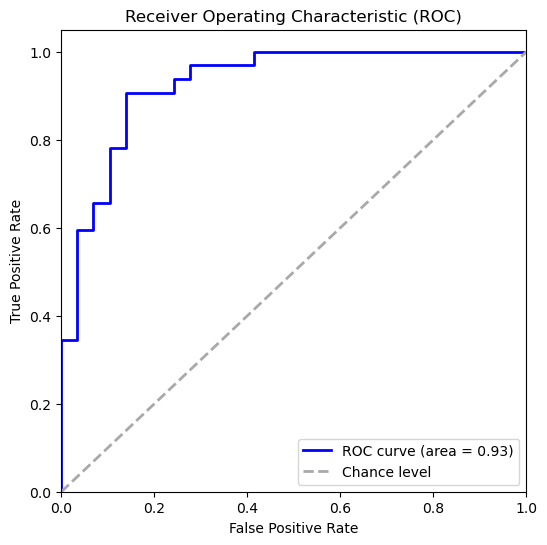

In [12]:
# Calculate the probability scores of the positive class
y_probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the ROC AUC score as a measure of the model's performance
roc_auc = roc_auc_score(y_test, y_probs)

# Plotting the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--', label='Chance level')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Plotting Confusion Matrix

The confusion matrix is a critical metric for evaluating the performance of a classifier. It shows the actual versus predicted classifications and provides insight into the types of errors made by the classifier. Seaborn's heatmap provides a visually appealing and informative way to display the confusion matrix.

Steps to plot a confusion matrix:
1. Generate the confusion matrix using confusion_matrix.
2. Use Seaborn's heatmap function to create the heatmap visualization.

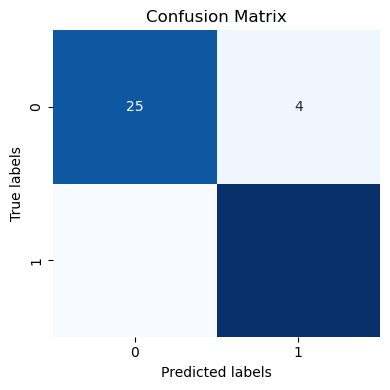

In [13]:
# Generate the confusion matrix from the true labels and predictions
conf_mat = confusion_matrix(y_test, y_preds)

# Plotting the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(4, 4))  
ax = sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', cbar=False)
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')       
ax.set_title('Confusion Matrix')   

# Adjust the layout to make room for the x-axis and y-axis labels
plt.tight_layout()

plt.show()

### Calculate evaluation metrics using cross-validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The goal is to assess how the results of a statistical analysis will generalize to an independent data set. It's particularly useful in scenarios where the goal is to predict the outcome and one wants to estimate how accurately a predictive model will perform in practice.

The primary metrics used to evaluate a classification model include accuracy, precision, recall, and the F1 score. Below, we calculate these metrics using cross-validation to gain a more accurate estimation by averaging the metric over several different partitions of the data.

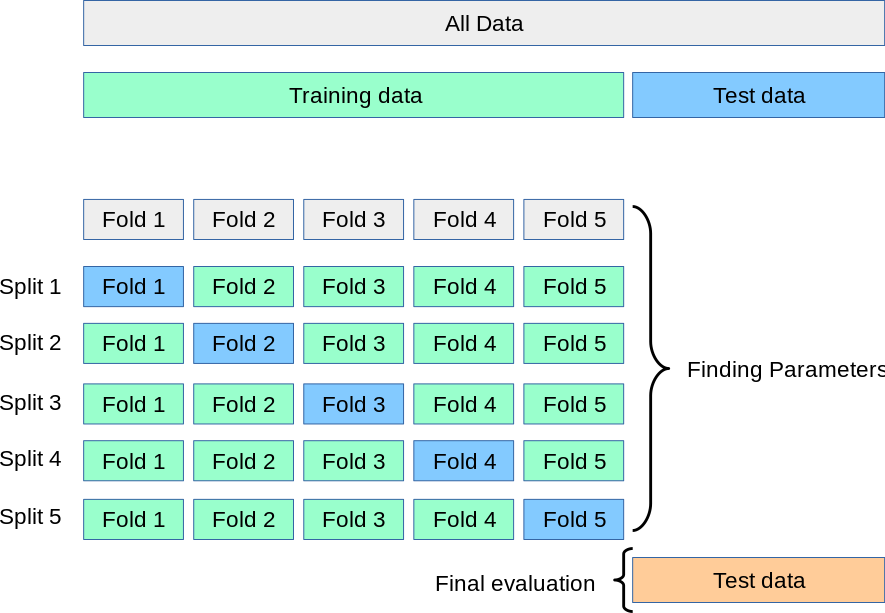

In [14]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc_mean = np.mean(cv_acc)

# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision_mean = np.mean(cv_precision)

# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall_mean = np.mean(cv_recall)

# Cross-validated F1 score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1_mean = np.mean(cv_f1)

# Output the mean cross-validated scores
print(f"Cross-validated accuracy: {cv_acc_mean:.3f}")
print(f"Cross-validated precision: {cv_precision_mean:.3f}")
print(f"Cross-validated recall: {cv_recall_mean:.3f}")
print(f"Cross-validated F1 score: {cv_f1_mean:.3f}")

Cross-validated accuracy: 0.825
Cross-validated precision: 0.820
Cross-validated recall: 0.879
Cross-validated F1 score: 0.847


## 5. Model Improvement

Improving a machine learning model's baseline metrics is crucial for achieving better predictive performance. In this section, we explore two primary avenues for model improvement: **data enhancements**  and **model enhancements**.

**Data perspective**:

Collect More Data
* One potential improvement is to collect more data. In machine learning, a larger dataset often leads to better model performance. More data provides the model with additional opportunities to learn intricate patterns and relationships within the data.

Improve Data Quality
* Data quality matters. Enhancing data quality can involve addressing missing values, cleaning noisy data, or adopting a better data encoding strategy, such as transforming non-numeric data into numerical form.

**Model perspective**:

Consider Better Models
* Evaluating the choice of the model itself is essential. If you've initially started with a simple model, consider exploring more complex ones. For instance, the Scikit-Learn machine learning map suggests that ensemble methods are generally considered more complex models.

Hyperparameter Tuning (**focus of this section**)
* Hyperparameters are model settings that you can adjust to alter the way the model learns patterns. Fine-tuning hyperparameters, known as hyperparameter tuning, can significantly improve a model's performance.



### How to find a Model's Hyperparameters

Understanding the hyperparameters of a model is crucial for tuning it to achieve the best performance. Each model in Scikit-Learn comes with a set of configurable hyperparameters that control the learning process. To inspect these hyperparameters and their current values, we can use the get_params() method.

Here's how you can retrieve the hyperparameters of a logistic regression model, for example:

In [15]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Hyperparameter Tuning (by Hand)
One common method for tuning hyperparameters is manual tuning, where you experiment with different values to find the best configuration. In this section, we demonstrate how to manually tune the n_neighbors hyperparameter for a **K-Nearest Neighbors (KNN)** classifier.

In [16]:
# Tune KNN (using n_neighbors hyperparameter)
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Initialize a KNN instance
knn = KNeighborsClassifier()

# Loop through n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

# Display the training scores and test scores
print("Training Scores:", train_scores)
print("\n")
print("Test Scores:", test_scores)


Training Scores: [1.0, 0.8099173553719008, 0.7727272727272727, 0.743801652892562, 0.7603305785123967, 0.7520661157024794, 0.743801652892562, 0.7231404958677686, 0.71900826446281, 0.6942148760330579, 0.7272727272727273, 0.6983471074380165, 0.6900826446280992, 0.6942148760330579, 0.6859504132231405, 0.6735537190082644, 0.6859504132231405, 0.6652892561983471, 0.6818181818181818, 0.6694214876033058]


Test Scores: [0.6229508196721312, 0.639344262295082, 0.6557377049180327, 0.6721311475409836, 0.6885245901639344, 0.7213114754098361, 0.7049180327868853, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.7540983606557377, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.6885245901639344, 0.7213114754098361, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.6557377049180327]


Maximum KNN score on the test data: 75.41% (Number of Neighbors: 11)


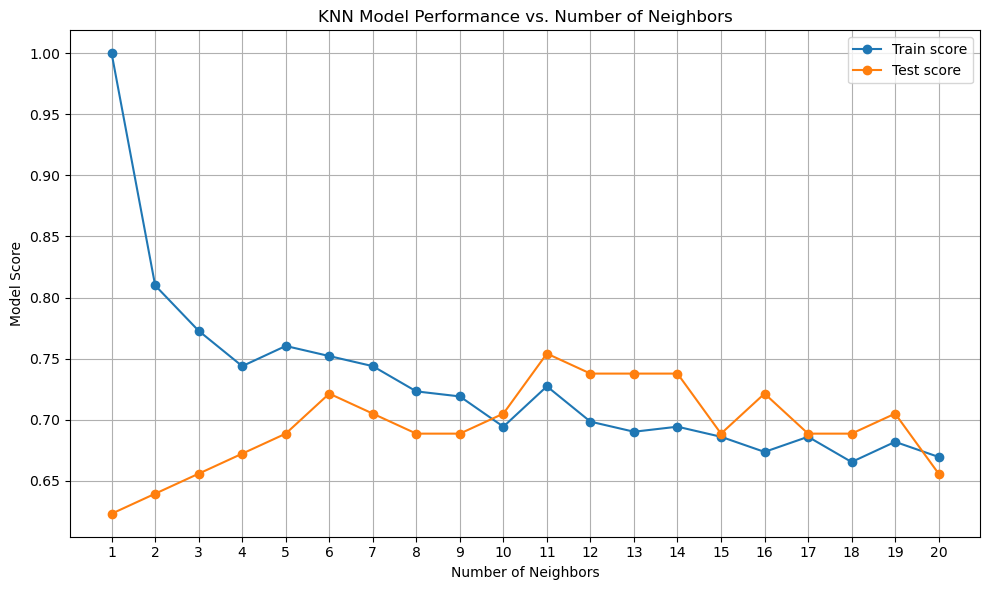

In [17]:
# Plot training and test scores
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_scores, label="Train score", marker='o')
plt.plot(neighbors, test_scores, label="Test score", marker='o')

# Customize the plot
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.title("KNN Model Performance vs. Number of Neighbors")
plt.legend()

# Find the index of the maximum test score
max_test_score_index = np.argmax(test_scores)
max_test_score = test_scores[max_test_score_index] * 100
optimal_neighbors = neighbors[max_test_score_index]

# Show the maximum test score and the corresponding number of neighbors as a statement
print(f"Maximum KNN score on the test data: {max_test_score:.2f}% (Number of Neighbors: {optimal_neighbors})")

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Hyperparameter Tuning (RandomizedSearchCV)

In this section, we'll explore the process of hyperparameter tuning using RandomizedSearchCV for two machine learning models: Logistic Regression and Random Forest Classifier. Hyperparameter tuning aims to find the best combination of hyperparameters to optimize model performance.

First, we define the hyperparameter grids for each model:

In [18]:
# Create hyperparameter grid for LogisticRegression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}


# Create hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}


We'll begin by tuning the hyperparameters of the Logistic Regression model:

In [19]:
# Set a random seed for reproducibility
np.random.seed(42)

# Setup a RandomizedSearchCV for LogisticRegression
rs_log_reg = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

# Fit the RandomizedSearchCV model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

# Best hyperparameters for LogisticRegression
print(rs_log_reg.best_params_)

# Evaluate the randomized search Logistic Regression model
print(rs_log_reg.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'solver': 'liblinear', 'C': 0.23357214690901212}
0.8852459016393442


We'll repeat by tuning the hyperparameters of the Random Forest Classifier:

In [20]:
 # Set a random seed for reproducibility
np.random.seed(42)

# Setup a RandomizedSearchCV for RandomForestClassifier
rs_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

# Fit the RandomizedSearchCV model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

# Best hyperparameters for RandomForestClassifier
print(rs_rf.best_params_)

# Evaluate the randomized search Logistic Regression model
print(rs_rf.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'n_estimators': 210, 'min_samples_split': 4, 'min_samples_leaf': 19, 'max_depth': 3}
0.8688524590163934


### Hyperparameter Tuning (GridSearchCV)
We aim to further improve the performance of our Logistic Regression model by utilizing GridSearchCV. GridSearchCV systematically searches through a specified hyperparameter grid to find the best combination of hyperparameters for our model.

We define the hyperparameter grid for Logistic Regression with different values of C:

log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"]
}

We proceed with tuning the hyperparameters of the Logistic Regression model using GridSearchCV:

In [21]:
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    verbose=True
)

# Fit the grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

# Best hyperparameters for LogisticRegression
print(gs_log_reg.best_params_)

# Evaluate the grid search LogisticRegression model on the test data
print(gs_log_reg.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 0.23357214690901212, 'solver': 'liblinear'}
0.8852459016393442


## 6. Model Deployment

We'll discuss how to save and load a machine learning model using the pickle library. Saving and loading models is a crucial step when deploying machine learning models for future use or sharing them with others.

You can save an existing model to a file using the pickle library. Here's how it's done:

In [23]:
import pickle

# Save an existing model to a file
pickle.dump(rs_rf, open("rs_random_forest_model_1.pkl", "wb"))

To load a saved pickle model, follow these steps:

In [24]:
# Load a saved pickle model
loaded_pickle_model = pickle.load(open("rs_random_forest_model_1.pkl", "rb"))

Once the model is loaded, you can evaluate its performance on new data:

In [25]:
# Evaluate the loaded model on test data
loaded_pickle_model.score(X_test, y_test)

0.8688524590163934